# Exploratory Data Analysis
**Space Dataset from Maven Analytics**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. **Reading Excel or csv**

In [2]:
baby = pd.read_excel('babynames.xlsx')
baby.head(3)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,MALE,ASIAN AND PACIFIC ISLANDER,AARAV,15,51
1,2011,MALE,ASIAN AND PACIFIC ISLANDER,AARON,51,19
2,2011,MALE,ASIAN AND PACIFIC ISLANDER,ABDUL,20,46


In [3]:
sp = pd.read_csv('space_miss.csv')
sp.head(10)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
5,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05,18:27:00,Juno I,Explorer 2,Retired,NaN,Failure
6,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,NaN,Success
7,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-03-26,17:38:00,Juno I,Explorer 3,Retired,NaN,Success
8,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27,09:01:00,Sputnik 8A91,Sputnik-3 #1,Retired,NaN,Failure
9,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28,02:53:00,Vanguard,Vanguard TV5,Retired,NaN,Failure


In [4]:
print(sp)

        Company                                         Location        Date  \
0     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-10-04   
1     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-11-03   
2       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA  1957-12-06   
3          AMBA         LC-26A, Cape Canaveral AFS, Florida, USA  1958-02-01   
4       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA  1958-02-05   
...         ...                                              ...         ...   
4625     SpaceX          SLC-4E, Vandenberg SFB, California, USA  2022-07-22   
4626       CASC  LC-101, Wenchang Satellite Launch Center, China  2022-07-24   
4627     SpaceX       LC-39A, Kennedy Space Center, Florida, USA  2022-07-24   
4628  CAS Space           Jiuquan Satellite Launch Center, China  2022-07-27   
4629       CASC     LC-3, Xichang Satellite Launch Center, China  2022-07-29   

          Time            Rocket       

2. **Understanding the Columns and Datatypes**

In [5]:
sp.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus'],
      dtype='object')

In [6]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [7]:
sp.describe()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
count,4630,4630,4630,4503,4630,4630,4630,1265,4630
unique,62,158,4180,1300,370,4556,2,65,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1990-08-28,12:00:00,Cosmos-3M (11K65M),DSP,Retired,450,Success
freq,1777,251,4,52,446,8,3620,136,4162


In [8]:
sp.isna().sum()

Company             0
Location            0
Date                0
Time              127
Rocket              0
Mission             0
RocketStatus        0
Price            3365
MissionStatus       0
dtype: int64

- Entries in Time and Price are missing 
- Unique - 62 companies, 370 rockets and 4 Mission status

In [29]:
sp = sp.astype( {'Company':object, 'Location':str, 'Date':object, 'Time':object, 'Rocket':object, 'Mission':object,
       'RocketStatus':object, 'MissionStatus':object})

**Was unable to convert price to Float ($ sign or comma seaprators)**

**So they have to be removed and assigned to numeric**

In [10]:
sp['Price']= pd.to_numeric(sp['Price'],errors='coerce')

In [11]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        4630 non-null   object 
 1   Location       4630 non-null   object 
 2   Date           4630 non-null   object 
 3   Time           4503 non-null   object 
 4   Rocket         4630 non-null   object 
 5   Mission        4630 non-null   object 
 6   RocketStatus   4630 non-null   object 
 7   Price          1250 non-null   float64
 8   MissionStatus  4630 non-null   object 
dtypes: float64(1), object(8)
memory usage: 325.7+ KB


In [31]:
sp['Date']= pd.to_datetime(sp['Date'])
sp['Time']= pd.to_datetime(sp['Time'])
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   object        
 1   Location       4630 non-null   object        
 2   Date           4630 non-null   datetime64[ns]
 3   Time           4503 non-null   datetime64[ns]
 4   Rocket         4630 non-null   object        
 5   Mission        4630 non-null   object        
 6   RocketStatus   4630 non-null   object        
 7   Price          1250 non-null   float64       
 8   MissionStatus  4630 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 325.7+ KB


In [12]:
sp.describe()

,Price
count,1250.000000
mean,109.779560
std,131.516407
min,2.500000
25%,30.000000
50%,62.000000
75%,112.500000
max,450.000000


**But keep in mind the values for price attribute had more than 2000 null values**

So the above stats doesnot provide the right understanding of the Price attribute

In [13]:
sp.isna()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
4625,False,False,False,False,False,False,False,False,False
4626,False,False,False,False,False,False,False,True,False
4627,False,False,False,False,False,False,False,False,False
4628,False,False,False,False,False,False,False,True,False


**Count of Missing Values**

In [14]:
sp.isna().sum().sort_values(ascending=False)

Price            3380
Time              127
MissionStatus       0
RocketStatus        0
Mission             0
Rocket              0
Date                0
Location            0
Company             0
dtype: int64

In [15]:
Missing_percentage = (sp.isna().sum().sort_values(ascending=False)/len(sp))*100
Missing_percentage

Price            73.002160
Time              2.742981
MissionStatus     0.000000
RocketStatus      0.000000
Mission           0.000000
Rocket            0.000000
Date              0.000000
Location          0.000000
Company           0.000000
dtype: float64

In [16]:
md = Missing_percentage[Missing_percentage > 0]
md

Price    73.002160
Time      2.742981
dtype: float64

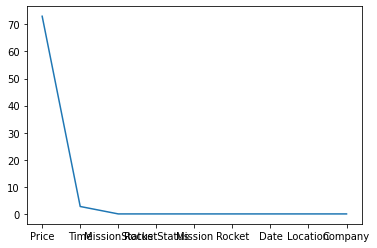

In [17]:
Missing_percentage.plot()

**Remove Coloumns if you dont need them**

Split the text column with delimter ,

In [18]:
sp.columns.get_loc("Location")

1

new_sp = sp.Location.str.split(expand=True)
print(new_sp)

In [21]:
sp.head(10)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
5,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05,18:27:00,Juno I,Explorer 2,Retired,NaN,Failure
6,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,NaN,Success
7,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-03-26,17:38:00,Juno I,Explorer 3,Retired,NaN,Success
8,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27,09:01:00,Sputnik 8A91,Sputnik-3 #1,Retired,NaN,Failure
9,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28,02:53:00,Vanguard,Vanguard TV5,Retired,NaN,Failure


In [32]:
sp['Year']= sp['Date'].dt.year
sp['Month']= sp['Date'].dt.month
print(sp)

        Company                                         Location       Date  \
0     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan 1957-10-04   
1     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan 1957-11-03   
2       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA 1957-12-06   
3          AMBA         LC-26A, Cape Canaveral AFS, Florida, USA 1958-02-01   
4       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA 1958-02-05   
...         ...                                              ...        ...   
4625     SpaceX          SLC-4E, Vandenberg SFB, California, USA 2022-07-22   
4626       CASC  LC-101, Wenchang Satellite Launch Center, China 2022-07-24   
4627     SpaceX       LC-39A, Kennedy Space Center, Florida, USA 2022-07-24   
4628  CAS Space           Jiuquan Satellite Launch Center, China 2022-07-27   
4629       CASC     LC-3, Xichang Satellite Launch Center, China 2022-07-29   

                    Time            Rocket         

In [33]:
sp.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus', 'Year', 'Month'],
      dtype='object')

In [37]:
columns = ['Company', 'Location', 'Date', 'Year', 'Month', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus']
sp = sp[columns]
sp.head(5)

,Company,Location,Date,Year,Month,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,1957,10,2023-06-23 19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,1957,11,2023-06-23 02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,1957,12,2023-06-23 16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,1958,2,2023-06-23 03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,1958,2,2023-06-23 07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


# Popular Company

In [63]:
pop_companies= sp.Company.value_counts()
pop_companies

RVSN USSR           1777
CASC                 338
Arianespace          293
General Dynamics     251
VKS RF               216
                    ... 
Khrunichev             1
GK LS                  1
OneSpace               1
Sandia                 1
Firefly                1
Name: Company, Length: 62, dtype: int64

**Top 10 companies**

In [69]:
companies_count[:10]

RVSN USSR           1777
CASC                 338
Arianespace          293
General Dynamics     251
VKS RF               216
NASA                 203
SpaceX               182
US Air Force         161
ULA                  151
Boeing               136
Name: Company, dtype: int64

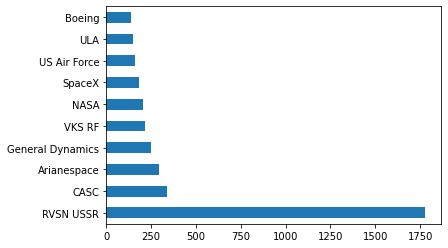

In [52]:
pop_companies[:10].plot(kind='barh')

In [79]:
pg_pop_companies= (sp.Company.value_counts())/(len(sp['Company']))*100
pg_pop_companies

RVSN USSR           38.380130
CASC                 7.300216
Arianespace          6.328294
General Dynamics     5.421166
VKS RF               4.665227
                      ...    
Khrunichev           0.021598
GK LS                0.021598
OneSpace             0.021598
Sandia               0.021598
Firefly              0.021598
Name: Company, Length: 62, dtype: float64

In [74]:
pg_pop_companies[:10]

RVSN USSR           38.380130
CASC                 7.300216
Arianespace          6.328294
General Dynamics     5.421166
VKS RF               4.665227
NASA                 4.384449
SpaceX               3.930886
US Air Force         3.477322
ULA                  3.261339
Boeing               2.937365
Name: Company, dtype: float64

### USSR dominates space launches by 38%
### NASA is at 6th pos. with 4% (203) launches

# Popular Rockets

In [43]:
popular_rockets = sp.Rocket.value_counts()
popular_rockets

Cosmos-3M (11K65M)     446
Voskhod                299
Molniya-M /Block ML    128
Cosmos-2I (63SM)       126
Soyuz U                125
                      ... 
Thor DM-18 Able-III      1
Atlas-E/F Star-17A       1
Scout G1                 1
Atlas-E/F Agena D        1
Jielong-1                1
Name: Rocket, Length: 370, dtype: int64

**Top and Bottom 10 Rockets**

In [81]:
popular_rockets[:15]

Cosmos-3M (11K65M)      446
Voskhod                 299
Molniya-M /Block ML     128
Cosmos-2I (63SM)        126
Soyuz U                 125
Tsyklon-3               122
Falcon 9 Block 5        111
Tsyklon-2               106
Vostok-2M                93
Molniya-M /Block 2BL     87
Ariane 5 ECA             80
Delta II 7925            62
Atlas-SLV3 Agena-D       47
Vostok-2                 45
Molniya-M /Block L       44
Name: Rocket, dtype: int64

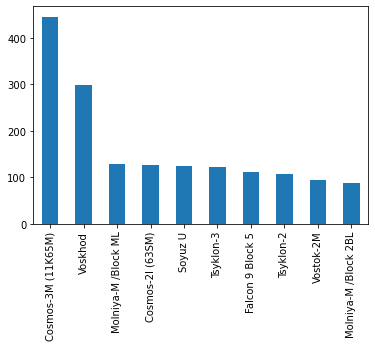

In [92]:
popular_rockets[:10].plot(kind='bar')

In [73]:
popular_rockets[-10:]

Minotaur V             1
Conestoga-1620         1
Safir-1A               1
Blue Scout II          1
H-IIS                  1
Thor DM-18 Able-III    1
Atlas-E/F Star-17A     1
Scout G1               1
Atlas-E/F Agena D      1
Jielong-1              1
Name: Rocket, dtype: int64

**Count of date by year**

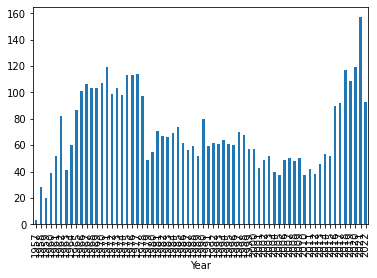

In [99]:
y_c = sp["Year"].groupby(sp["Year"]).count()
y_c.plot(kind="bar")

In [112]:
top_years = y_c.sort_values(ascending=False)[:10]
print(top_years)

Year
2021    157
1971    119
2020    119
2018    117
1977    114
1975    113
1976    113
2019    109
1970    107
1967    106
Name: Year, dtype: int64


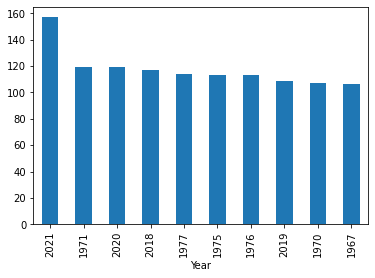

In [114]:
top_years.plot(kind='bar')

### In 1971  & 2020 we had made 119 launches

In [176]:
launchesin90 = (sp["Year"]).value_counts(bins=[1950,1999])
launchesin90

(1949.999, 1999.0]    3110
Name: Year, dtype: int64

In [185]:
launchesin2k = (sp["Year"]).value_counts(bins=[2000,2022])
launchesin2k

(1999.999, 2022.0]    1520
Name: Year, dtype: int64

In [186]:
launchin90_perc = (launchesin90/len(sp)) *100
launchin90_perc

(1949.999, 1999.0]    67.170626
Name: Year, dtype: float64

In [187]:
launchin2k_perc= (launchesin2k/len(sp))*100
launchin2k_perc

(1999.999, 2022.0]    32.829374
Name: Year, dtype: float64

### Space Industry was so active before 2000s

In [189]:
(sp["Year"]).value_counts(bins=12)

(2016.583, 2022.0]      687
(1967.833, 1973.25]     634
(1973.25, 1978.667]     535
(1962.417, 1967.833]    395
(1978.667, 1984.083]    377
(1994.917, 2000.333]    373
(1989.5, 1994.917]      326
(1984.083, 1989.5]      303
(2011.167, 2016.583]    279
(2005.75, 2011.167]     276
(1956.934, 1962.417]    224
(2000.333, 2005.75]     221
Name: Year, dtype: int64

### 1967-1973 was peak in Space race  with around634 launches.
### Stagnation is clearly visible from comparing launches in 1956-1962 and 2000-2005 ( last 2 entries)**

In [201]:
launch_months = (sp["Month"]).value_counts()
launch_months

12    492
6     431
4     409
10    403
8     391
9     386
7     380
3     378
11    365
2     361
5     350
1     284
Name: Month, dtype: int64

### Most Launches happened in December, June, April